## Predicting Hospital Readmissions

In [86]:
#### Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [87]:
# importing dataset
df = pd.read_csv(r'D:\Data set\hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


### Data Preprocessing Part 1

In [88]:
df.select_dtypes(include='object').nunique()

age                  6
medical_specialty    7
diag_1               8
diag_2               8
diag_3               8
glucose_test         3
A1Ctest              3
change               2
diabetes_med         2
readmitted           2
dtype: int64

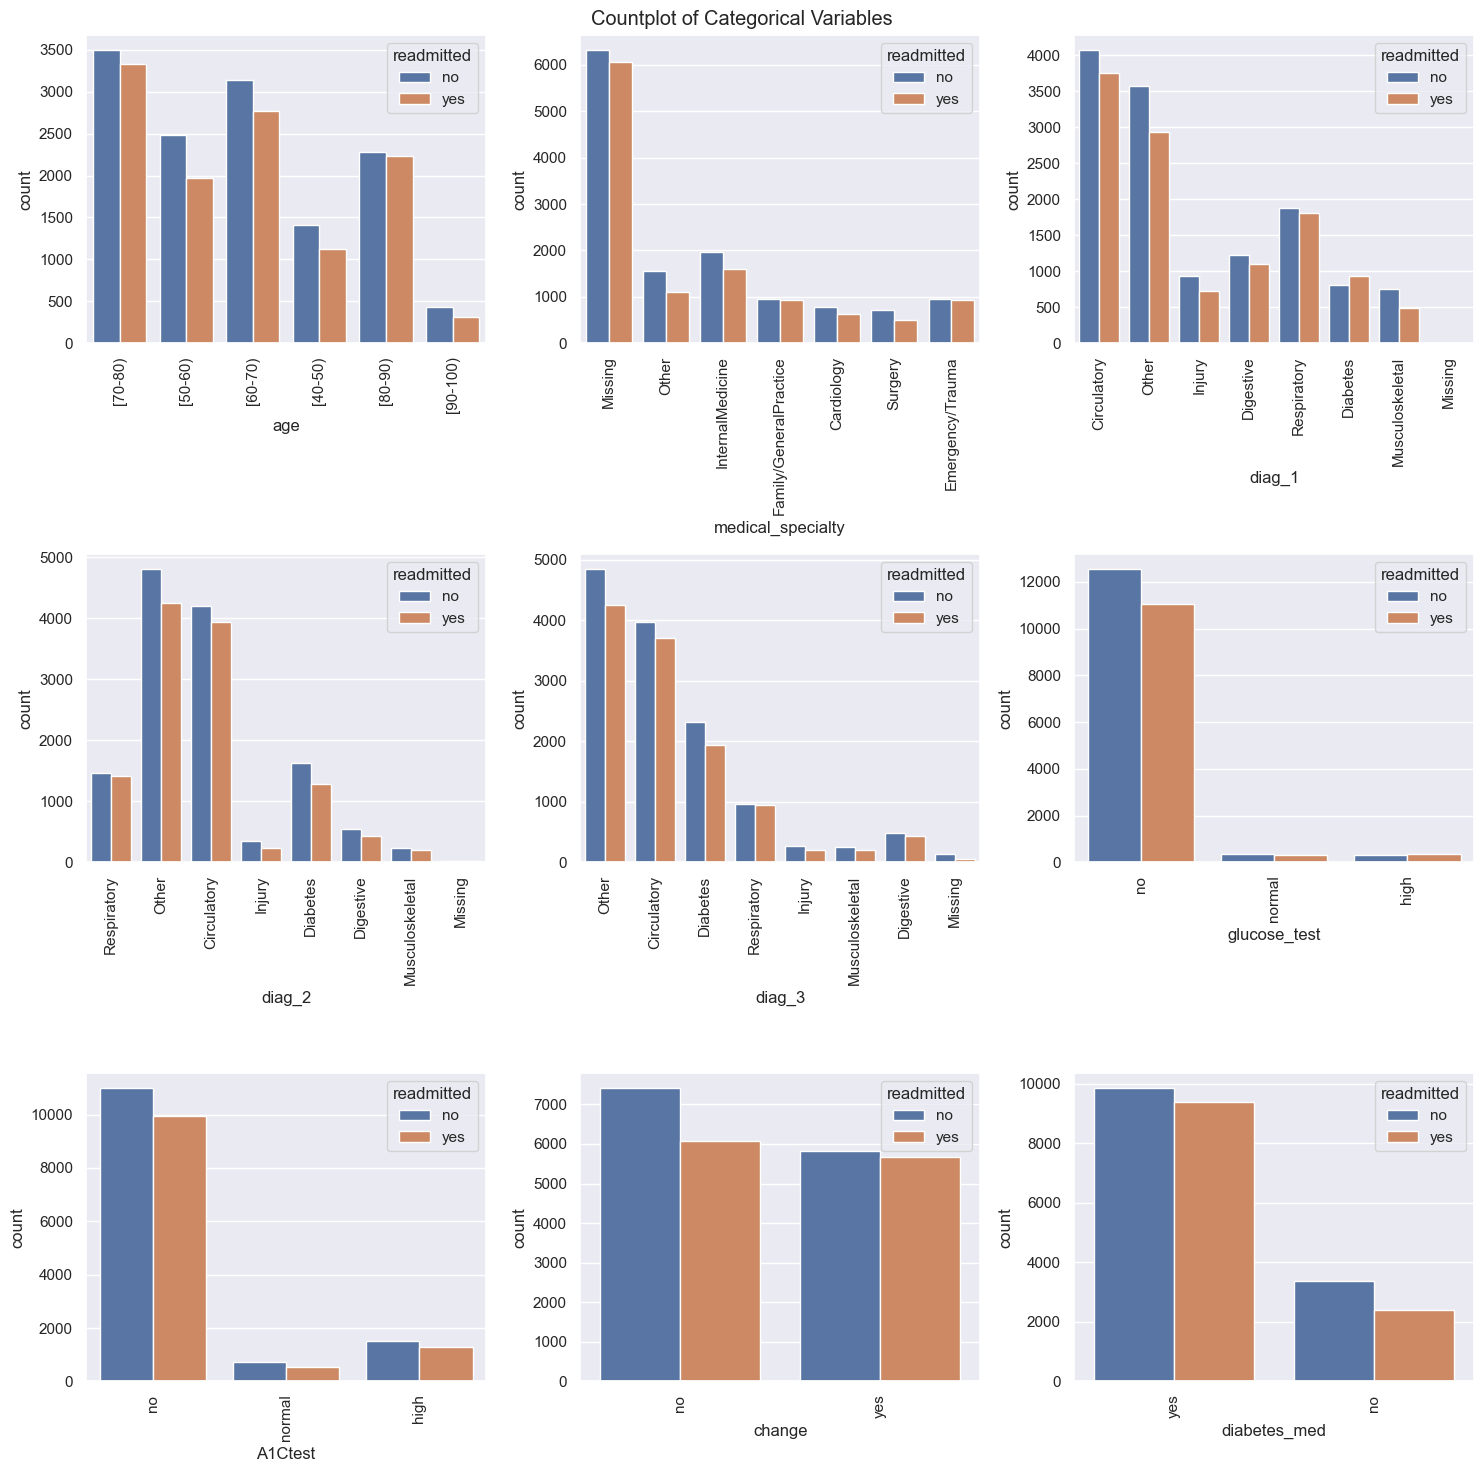

In [89]:
# list of categorical data to plot
cat_vars = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med']

# creating figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axs = axs.flatten()

fig.suptitle("Countplot of Categorical Variables")

for i,var in enumerate(cat_vars):
    sns.countplot(x=var, hue='readmitted', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()    
plt.show()

In [90]:
df.select_dtypes(include='int').columns

Index(['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency'],
      dtype='object')

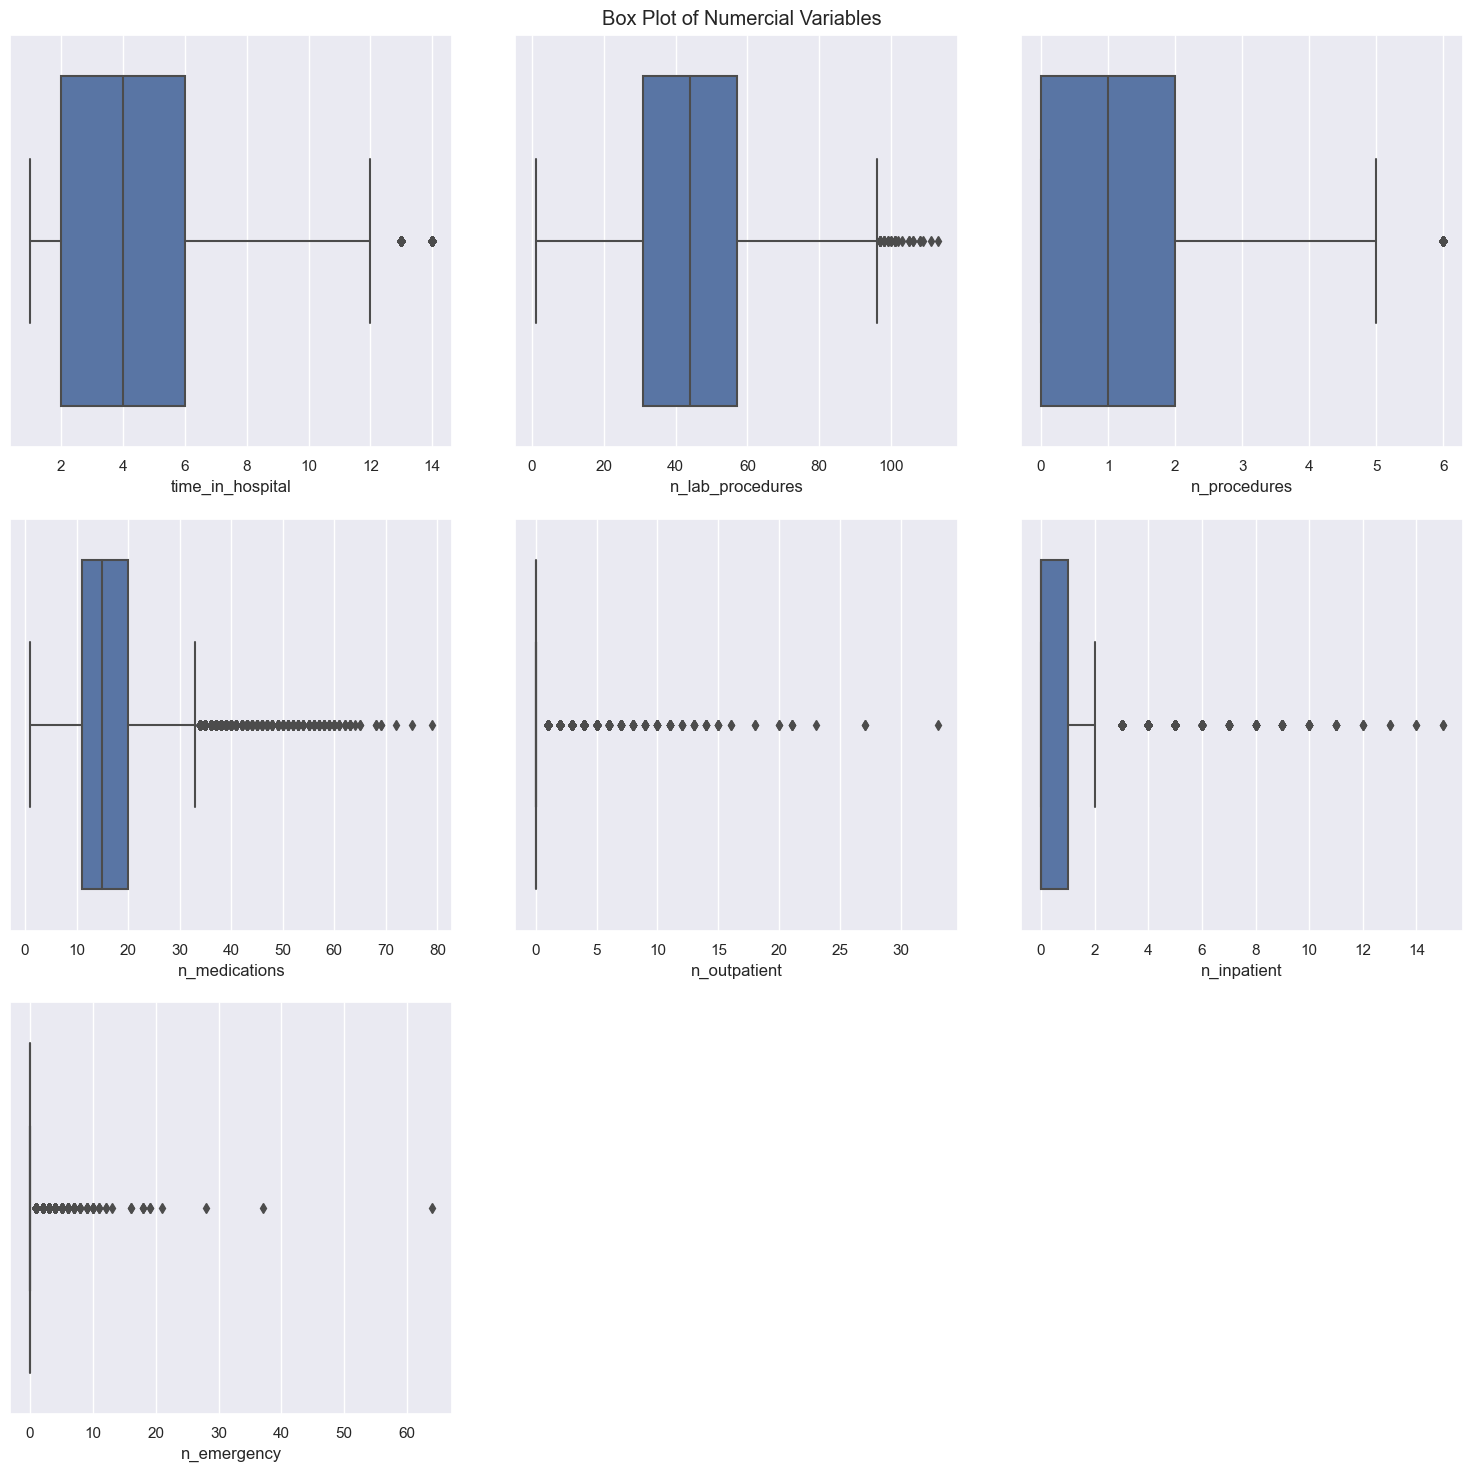

In [91]:
# list of numerical data to plot
num_vars = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency']

#creating figure with subplots
fig, axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.flatten()

fig.suptitle("Box Plot of Numercial Variables")

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()    

#removing 8th and 9th subplot
fig.delaxes(axs[7])
fig.delaxes(axs[8])

plt.show()

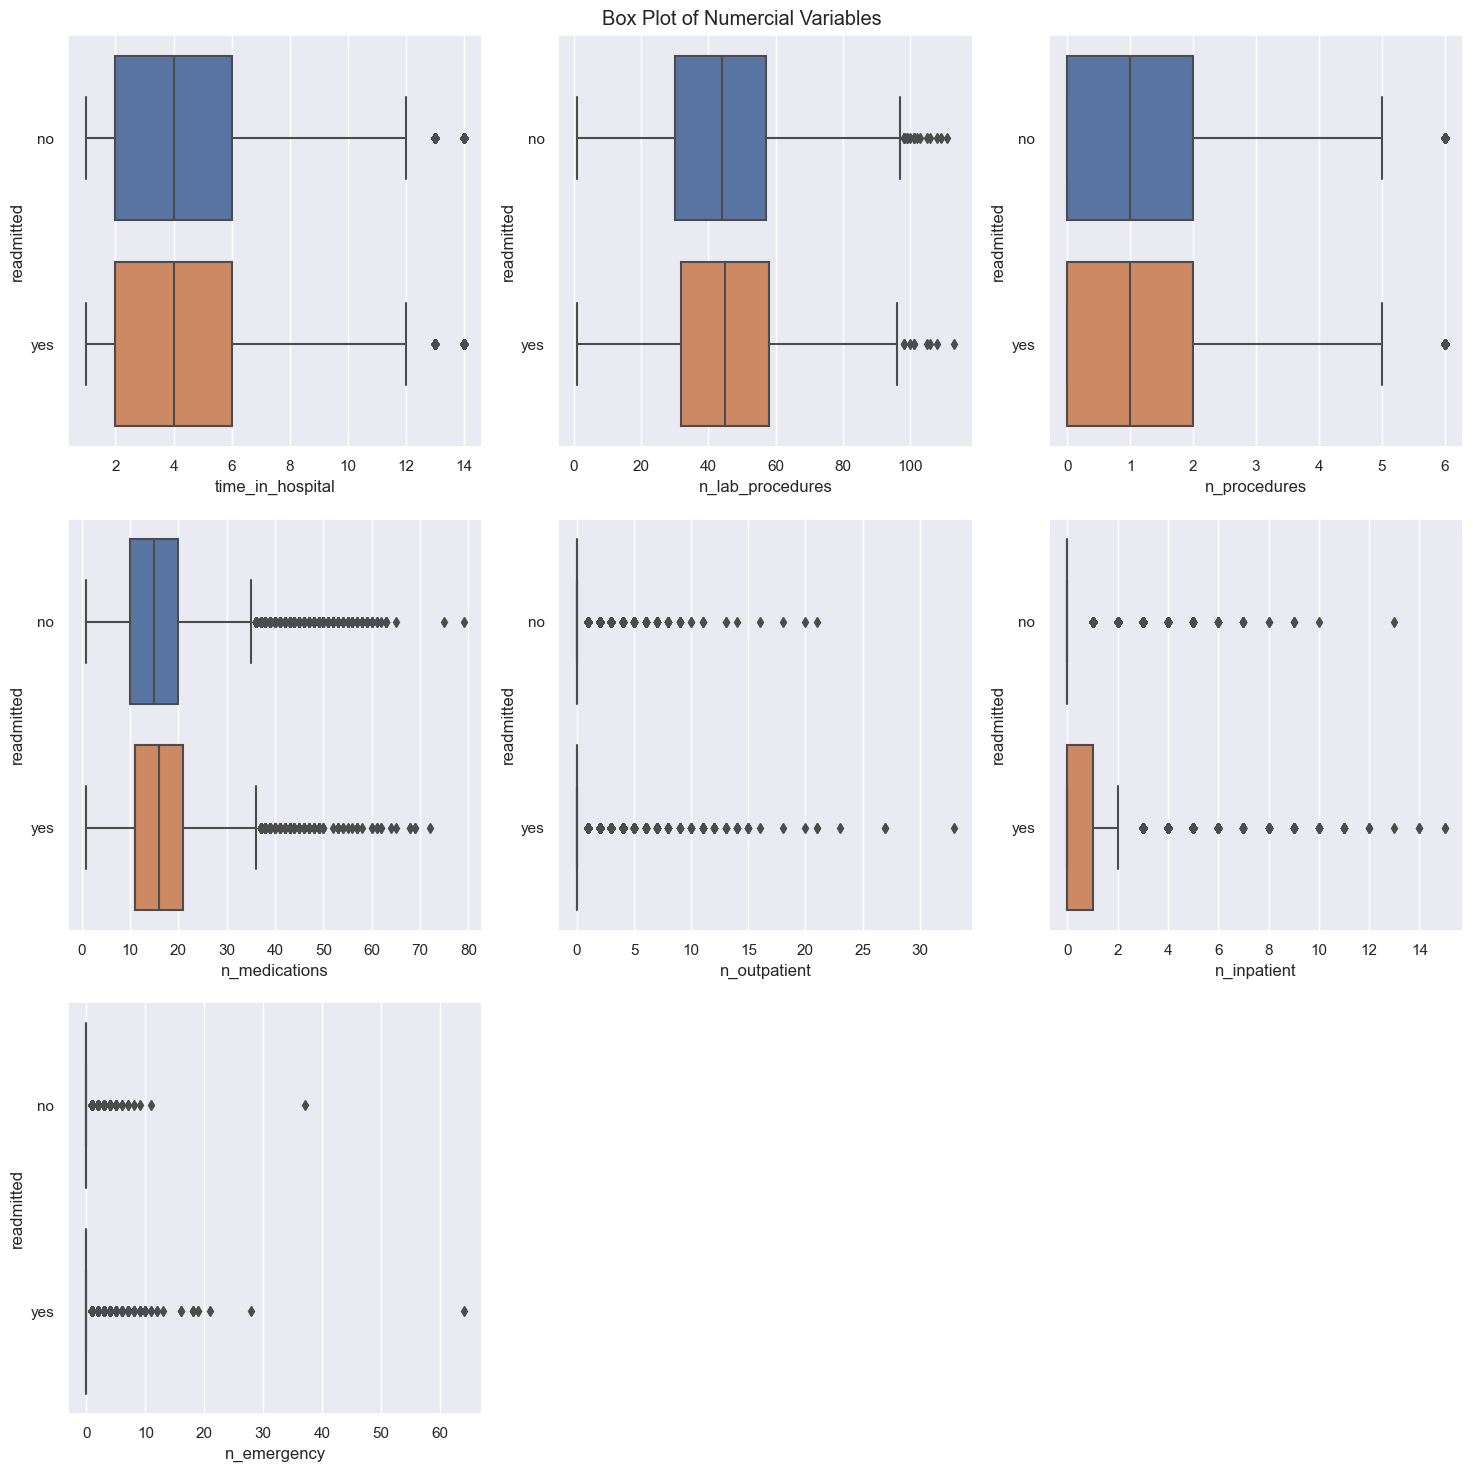

In [92]:
# list of numerical data to plot
num_vars = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency']

#creating figure with subplots
fig, axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.flatten()

fig.suptitle("Box Plot of Numercial Variables")

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, y='readmitted', data=df, ax=axs[i])

fig.tight_layout()    

#removing 8th and 9th subplot
fig.delaxes(axs[7])
fig.delaxes(axs[8])

plt.show()

### Data Preprocessing Part 2

In [93]:
# check missing data value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [94]:
display(df.head())
display(df.shape)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


(25000, 17)

In [95]:
for col in df.select_dtypes(include='object').columns:
        print(f"{col}:{df[col].unique()}")

age:['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']
medical_specialty:['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']
diag_1:['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']
diag_2:['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']
diag_3:['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']
glucose_test:['no' 'normal' 'high']
A1Ctest:['no' 'normal' 'high']
change:['no' 'yes']
diabetes_med:['yes' 'no']
readmitted:['no' 'yes']


In [96]:
from sklearn.preprocessing import LabelEncoder

#looping over each column
for col in df.select_dtypes(include='object').columns:
    # initializing a labelencoder object
    le = LabelEncoder()
    
    # transform values of the column
    df[col] = le.fit_transform(df[col])
    
    # print unique encoded of value of each column
    print(f"{col}:{df[col].unique()}")


age:[3 1 2 0 4 5]
medical_specialty:[4 5 3 2 0 6 1]
diag_1:[0 6 3 2 7 1 5 4]
diag_2:[7 6 0 3 1 2 5 4]
diag_3:[6 0 1 7 3 5 2 4]
glucose_test:[1 2 0]
A1Ctest:[1 2 0]
change:[0 1]
diabetes_med:[1 0]
readmitted:[0 1]


### Removing Outlier using the IQR Method 

In [97]:
# print no. row before removing
df.shape

(25000, 17)

In [98]:
# define function to remove the outliers
def remove_outlier(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        low_bound = q1 - 1.5*iqr
        upp_bound = q1 + 1.5*iqr
        df = df[(df[col] >= low_bound) & (df[col] <= upp_bound)]
    return df

# specify particular columns to remove outliers
cols_to_check = ['n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

# calling the function
df_clean = remove_outlier(df, cols_to_check)

df_clean.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
1,3,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,0
2,1,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,1
4,2,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,0
5,0,2,51,0,10,0,0,0,4,6,6,6,1,1,0,0,1
6,1,4,44,2,21,0,0,0,4,3,6,6,1,2,1,1,0


In [99]:
df_clean.shape

(14949, 17)

In [100]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14949 entries, 1 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                14949 non-null  int32
 1   time_in_hospital   14949 non-null  int64
 2   n_lab_procedures   14949 non-null  int64
 3   n_procedures       14949 non-null  int64
 4   n_medications      14949 non-null  int64
 5   n_outpatient       14949 non-null  int64
 6   n_inpatient        14949 non-null  int64
 7   n_emergency        14949 non-null  int64
 8   medical_specialty  14949 non-null  int32
 9   diag_1             14949 non-null  int32
 10  diag_2             14949 non-null  int32
 11  diag_3             14949 non-null  int32
 12  glucose_test       14949 non-null  int32
 13  A1Ctest            14949 non-null  int32
 14  change             14949 non-null  int32
 15  diabetes_med       14949 non-null  int32
 16  readmitted         14949 non-null  int32
dtypes: int32(10)

In [101]:
X = df_clean.iloc[:,:-1]
X

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med
1,3,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1
2,1,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1
4,2,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1
5,0,2,51,0,10,0,0,0,4,6,6,6,1,1,0,0
6,1,4,44,2,21,0,0,0,4,3,6,6,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,2,2,61,4,11,0,0,0,4,0,0,0,1,1,1,1
24996,4,2,66,0,24,0,0,0,4,2,3,6,1,0,1,1
24997,3,5,12,0,6,0,1,0,4,6,6,6,2,1,0,0
24998,3,2,61,3,15,0,0,0,2,7,1,6,1,1,1,1


In [102]:
y = df_clean.iloc[:,-1]
y

1        0
2        1
4        0
5        1
6        0
        ..
24994    0
24996    1
24997    1
24998    0
24999    1
Name: readmitted, Length: 14949, dtype: int32

In [103]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(class_weight='balanced')

param_grid = {
    'C':[0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'C': 1, 'penalty': 'l2'}


In [105]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1, penalty='l2', class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced')

In [106]:
#Predicting the Test set results
y_pred = lr.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1132  675]
 [ 577  606]]


0.5812709030100335

In [108]:
classification_random = (classification_report(y_test, y_pred))
print(classification_random)

              precision    recall  f1-score   support

           0       0.66      0.63      0.64      1807
           1       0.47      0.51      0.49      1183

    accuracy                           0.58      2990
   macro avg       0.57      0.57      0.57      2990
weighted avg       0.59      0.58      0.58      2990



## Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight = "balanced", random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [110]:
y_pred = rfc.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1452  355]
 [ 840  343]]


0.6003344481605352

In [112]:
classification_random = (classification_report(y_test, y_pred))
print(classification_random)

              precision    recall  f1-score   support

           0       0.63      0.80      0.71      1807
           1       0.49      0.29      0.36      1183

    accuracy                           0.60      2990
   macro avg       0.56      0.55      0.54      2990
weighted avg       0.58      0.60      0.57      2990



We can see that we have numerical and continuous data, in our database we have a good amount of data, which makes our work easier, when we look at our data we can see that we do not have null values.

Looking at the correlation of our variables, we can see that we do not have strong correlations, which means that treatment is not necessary, looking at our categorical variables, we can see that we have some predominant values in our database, when we look at the continuous variables we can see that the higher the number, generally the smaller the amount of data available, looking exclusively at our target variable we can see that we have a good balance of data.

When we go to the bivariate analysis we can see that we do not have a defined pattern between our explanatory variables and our target variable.

Going to the machine learning part, I did not get a satisfactory result with this data, I tried to remove outliers, use one hot label encoder, remove some variables but even so we were not successful in achieving good accuracy, our best model was the Random Forest with 60%.

## Model Testing with LazyPredict
Identifying best performing models for future investigation

In [54]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.metrics import cohen_kappa_score

In [55]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=cohen_kappa_score,
                     predictions=False,
                     random_state=42,
                     classifiers = "all"
                     )

models_class, predictions_class = clf.fit(X_train , X_test , y_train , y_test)
models_class.sort_values(by='Accuracy', ascending=False,)

100%|██████████| 29/29 [04:15<00:00,  8.80s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,cohen_kappa_score,Time Taken
Model,,,,,,
SVC,0.62,0.54,0.54,0.56,0.10,36.12
AdaBoostClassifier,0.61,0.55,0.55,0.57,0.11,0.76
CalibratedClassifierCV,0.61,0.54,0.54,0.55,0.09,10.85
RidgeClassifierCV,0.61,0.54,0.54,0.55,0.09,0.13
LinearSVC,0.61,0.54,0.54,0.55,0.09,3.69
RidgeClassifier,0.61,0.54,0.54,0.55,0.09,0.24
LogisticRegression,0.61,0.54,0.54,0.55,0.09,0.08
LinearDiscriminantAnalysis,0.61,0.54,0.54,0.55,0.08,0.26
DummyClassifier,0.60,0.50,0.50,0.46,0.00,0.04
